<a href="https://colab.research.google.com/github/Thiagogiovanni/projetos_de_estudo/blob/main/webscraping_selenium_copa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping com Selenium + Nuvem de pontos**

<center><img alt="Analisando Airbnb" width="10%" src="https://s.glbimg.com/jo/g1/static/live/imagens/img_facebook.png?g1"></center> 

O site [G1](https://g1.globo.com/) é nacionalmente conhecido, sendo o maior portal de notícias do Brasil. Desde 2006 mantém o padrão Globo e com conteúdos multimídia vem tirando proveito da internet sobre os meios tradicionais de comunicação. Durante o ano de 2022 o portal teve uma grande importância na divulgação de notícias referentes ao maior evento do ano, a Copa do Mundo.



# Explicando sobre o projeto

A ideia desse projeto é criarmos um script capaz de acessar as informações sobre a Copa do Mundo no site do G1 e com isso fazermos uma nuvem de palavras, com a finalidade de termos uma noção sobre o que está ocorrendo em volta do evento.

**Nosso objetivo será recolher esses títulos em vermelho e os resumos referentes a eles**, por exemplo:
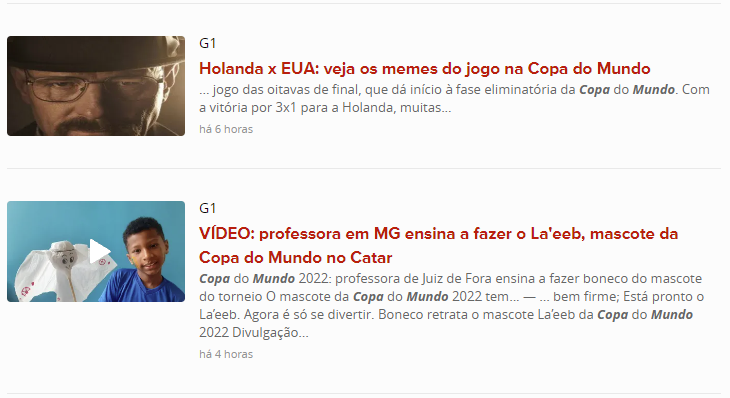

Durante a realização do projeto alguns problemas em acessar diretórios apareceram, por isso foi necessário "acessar" o navegador de forma diferente.

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#forma alternativa de fazer:
#driver = webdriver.Chrome('C:\Users\thiag\OneDrive\Área de Trabalho\DS Projetos\chromedriver', options=option)
#driver.get(url)


options = Options()
# options.headless = True - para esconder navegador
options.add_argument("start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [ ]:
url = 'https://g1.globo.com/busca/?q=COPA+DO+MUNDO&page=1'
driver.get(url)

In [ ]:

i =0
while i<5:
    # Scrollar para baixo na "primeira página"
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Aguardar a página carregar
    time.sleep(5)
    i += 1
# foi colado o i += 1 pois deixar while True iria pegar informações bem antigas e i<5 deixa informações mais novas.

As informações **(títulos e subtítulos)** estão dentro de uma seção identificada por content, por isso iremos acessar essa seção e pegar o HTML dela.

In [ ]:
element = driver.find_element("id", "content") #retornas as informações de content

#pegar as informações html dentro de content
html = element.get_attribute('outerHTML')

driver.quit() #fechar o browser 

In [ ]:
#Vamos filtrar o html para conseguirmos o que queremos, poderia usar o html5, mas aparentemente lxml é mais rápido

soup = BeautifulSoup(html, 'lxml')
#agora temos uma forma mais fácil de analisar e pegar informações de dentro do html

In [ ]:
#vamos montar nosso documento com as palavras

texto = []

for bloco in soup.find_all(class_ = 'widget--info__text-container'): #entrando na classe que contem o que queremos acessar
    for href in bloco.find_all('a'):
        titulo = href.find(class_ = 'widget--info__title product-color')
        if (titulo != None):
            texto.append(titulo.text[7:-2]) #coloca esse titulo.text para não vir nada além do texto
        subtitulo = href.find(class_ = 'widget--info__description')
        if (subtitulo != None):
            texto.append(subtitulo.text[7:-2])
texto = ' '.join(texto)
           
    

  Holanda x EUA: veja os memes do jogo na Copa do Mundo
     o das oitavas de final, que dá início à fase eliminatória da Copa do Mundo. Com a vitória por 3x1 para a Holanda, muitas. ro em quatro anos o mundo volta as suas atenções para a Copa do Mundo de Futebol. O maior evento esportivo do mundo é o momento em que a população de cada país participante se une para torcer por suas seleções. 
Todos sabemos a importância do futebol e .   VÍDEO: professora em MG ensina a fazer o La'eeb, mascote da Copa do Mundo no Catar
      Mundo 2022: professora de Juiz de Fora ensina a fazer boneco do mascote do torneio
O mascote da Copa do Mundo 2022 tem... — ... bem firme;
Está pronto o La’eeb. Agora é só se divertir.
Boneco retrata o mascote La’eeb da Copa do Mundo 2022
Divulgação.   De Danielzinho Alves a Neymar, cães para adoção viram figurinhas da Copa do Mundo e querem assistir ao hexa em novo lar
     elzinho Alves a Neymar, cachorros com nomes de jogadores viram figurinhas da Copa do Mundo pa

In [ ]:
#Agora vamos de fato começar a criação da nuvem de palavras

#usaremos nltk para auxiliar em retirar as palavras "irrelevantes"

import nltk 
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese') + ['copa'] #tirar palavras que são comuns no português e a palavra copa
comment_words = '' #novo texto

tokens = texto.split() #quebrando o texto nos espaços em palavras sozinhas

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower() #deixando as palavras todas minusculas para n diferenciar Taxa e taxa, por exemplo

comment_words += " ".join(tokens)+" " #fazendo um novo texto com as palavras separadas por espaço e com as letras minusculas


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


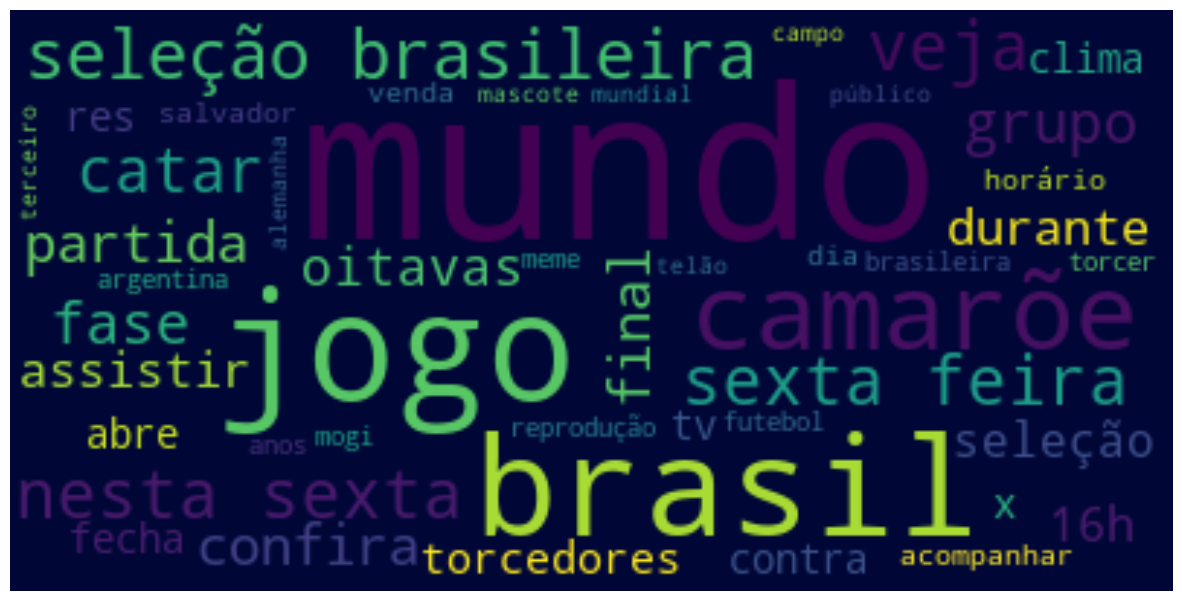

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image #limitar a nuvem na imagem q colocaremos
from wordcloud import WordCloud #vai desenhar as palavras de fato

#erro no diretório, não consegui colocar fundo na nuvem de palavras

#mask = np.array(Image.open(r'C:\Users\thiag\OneDrive\Área de Trabalho\DS Projetos')) #imagem por tras da nuvem

wordcloud = WordCloud(margin = 5,
                background_color ='rgb(0, 7, 55)',
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words) #de onde vai gerar a nuvem


default_colors = wordcloud.to_array() #pegar as informações e deixando ela de forma que conseguimos desenhar
plt.figure(figsize= [15,20])
plt.imshow(default_colors, interpolation="bilinear") #pegar a nuvem de palavras q foi transformada e mostra na minha tela
wordcloud.to_file("wordcloud.png")
plt.axis("off") #sem eixos x e y
plt.show()